# Build DSP Train

This notebook processes the waveforms in the training dataset using the **dspeed** package. The contents of the output file are the inputs for the AP-SVM model. First, we load modules and files.

In [1]:
# Load modules 
import os, json, lgdo
import numpy as np
import matplotlib.pyplot as plt
from dspeed import build_dsp

Load the training dataset raw file and the **dsp** configuration file with the necessary processors.

In [5]:
raw_file = f'./train_data_raw.h5'
dsp_file = f'./train_data_dsp.h5'

with open("./dsp_config_train.json", "r") as f:
    dsp_config = json.load(f)

Here we DSP the training dataset.

In [6]:
import logging 
logger = logging.getLogger(__name__)
logger.setLevel(level='DEBUG')

build_dsp(raw_file, 
          dsp_file, 
          dsp_config = dsp_config,
          write_mode = 'r')

Sanity check to make sure the **dsp** file was written properly.

In [7]:
lgdo.lh5.show(dsp_file)

/
└── detector · HDF5 group 
    └── dsp · table{energy,svm_label} 
        ├── energy · array<1>{real} 
        └── svm_label · array<1>{real} 


Look at the normalized discrete wavelet transformed waveforms. Make sure that the amplitudes should be in between -1 and 1. 

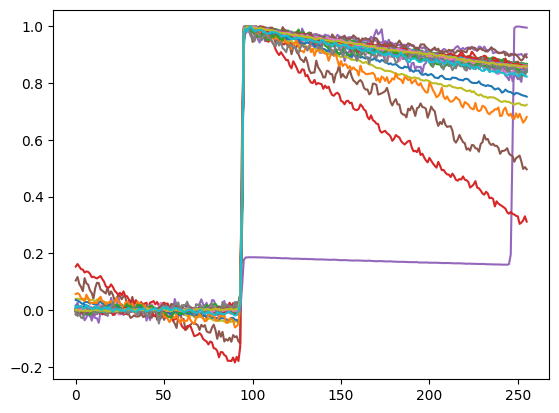

In [7]:
sto = lgdo.lh5.LH5Store()
tb, _ = sto.read('detector/dsp', dsp_file)
  
energies = tb['energy'].nda
dwts = tb['dwt_norm'].nda

fig, ax = plt.subplots(1,1)

cut = np.where(energies > 0)[0]
samples = dwts[cut][0:50]

for i in samples:
    ax.plot(i)